In [1]:
from ipynb.fs.full.Utils import load_dataset, scale_data
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import losses, optimizers
from keras.callbacks import EarlyStopping

/home/ivan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from sklearn import preprocessing
from sklearn import datasets
from sklearn import model_selection

In [5]:
df = load_dataset(split=False)

In [6]:
metal = df[df.category == 'metal']
country = df[df.category == 'country']
df = metal.append(country)

In [7]:
df.shape

(1521, 25)

In [8]:
x = df.drop(['category'], axis=1)
y = df['category']

In [9]:
y = (y == 'country') + 0

In [10]:
countries = np.sum(y == 1)
metals = np.sum(y == 0)
print("Country songs: ", countries)
print("Metal songs: ", metals)

Country songs:  771
Metal songs:  750


In [11]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, \
                                                                    y, \
                                                                    train_size=0.7, \
                                                                    test_size=0.3, \
                                                                    stratify=y, \
                                                                    random_state=42)

In [12]:
def one_hot(y, C):
    y_one_hot = np.zeros((y.shape[0], C))
    y_one_hot[np.arange(0, y.shape[0]), y] = 1
    
    return y_one_hot

In [13]:
number_of_classes = len(y.unique())
y_train = one_hot(y_train, number_of_classes)
y_test = one_hot(y_test, number_of_classes)

In [14]:
y_train.shape
y_test.shape

(457, 2)

In [15]:
x_train.shape

(1064, 24)

In [16]:
number_of_features = x_train.shape[1]
output_size = number_of_classes

In [17]:
x_train, x_test = scale_data(x_train, x_test)

In [18]:
model = Sequential()

In [19]:
model.add(Dense(units = 60, input_dim = number_of_features, activation = 'relu'))

In [20]:
model.add(Dense(units=30, activation='relu'))

In [21]:
model.add(Dense(units = output_size, activation='softmax'))

In [22]:
model.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 60)                1500      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 62        
Total params: 3,392
Trainable params: 3,392
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(x_train, y_train, epochs= 20, batch_size=32, verbose=1, validation_split=0.3, \
                    callbacks=[EarlyStopping(patience=3)])

Train on 744 samples, validate on 320 samples
Epoch 1/20
744/744 [==============================] - 2s 3ms/step - loss: 0.6546 - acc: 0.6599 - val_loss: 0.4916 - val_acc: 0.8406
Epoch 2/20
744/744 [==============================] - 0s 638us/step - loss: 0.3967 - acc: 0.8858 - val_loss: 0.3303 - val_acc: 0.9031
Epoch 3/20
744/744 [==============================] - 0s 414us/step - loss: 0.2743 - acc: 0.9180 - val_loss: 0.2396 - val_acc: 0.9094
Epoch 4/20
744/744 [==============================] - 0s 405us/step - loss: 0.2121 - acc: 0.9301 - val_loss: 0.1978 - val_acc: 0.9094
Epoch 5/20
744/744 [==============================] - 0s 425us/step - loss: 0.1789 - acc: 0.9395 - val_loss: 0.1798 - val_acc: 0.9250
Epoch 6/20
744/744 [==============================] - 0s 453us/step - loss: 0.1617 - acc: 0.9395 - val_loss: 0.1690 - val_acc: 0.9250
Epoch 7/20
744/744 [==============================] - 0s 447us/step - loss: 0.1490 - acc: 0.9489 - val_loss: 0.1631 - val_acc: 0.9313
Epoch 8/20
744/744

In [25]:
epochs = history.epoch

In [26]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

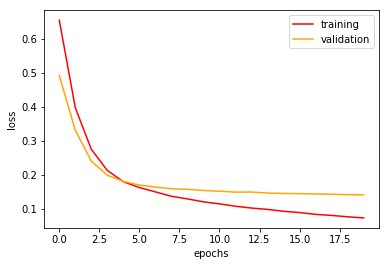

In [27]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='orange', label='validation')
plt.legend(loc='best')

In [28]:
acc = history.history['acc']
validation_acc = history.history['val_acc']

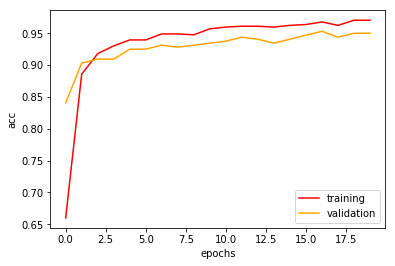

In [29]:
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='orange', label='validation')
plt.legend(loc='best')

In [30]:
# evaluacija mreze
test_loss, test_acc = model.evaluate(x_test, y_test)
print ("Test loss: {}, test accuracy: {}".format(test_loss, test_acc))

457/457 [==============================] - 0s 178us/step
Test loss: 0.1636981233237087, test accuracy: 0.9387308533916849


In [31]:
#model.fit(x_train, y_train, epochs=7, batch_size=32)

In [32]:
print(x_test[1:2])
print(y_test[1:2]) # metal

[[-1.0672969   0.71002017  0.63526316 -1.63757775  0.21978416 -0.64924084
  -0.21675755  0.00553326 -0.73099352  1.14146396 -0.57927533  0.18781949
  -0.31851103 -0.24011263 -0.29277002 -0.29087376 -0.34299717 -0.32562111
  -0.2220578  -0.31129924 -0.29840929 -0.30947948 -0.39084873  4.02011074]]
[[1. 0.]]


In [33]:
model.predict(x_test[1:2])

array([[0.9934378 , 0.00656221]], dtype=float32)

In [34]:
# model je ispravno pogodio!